<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_1_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.011635,53.223175,0.047808,102.282619,102.240358,0.042260
1,0.0,1.0,33.412709,48.688468,-0.008827,92.092350,92.104723,-0.012373
2,0.0,2.0,61.158425,35.459787,0.076353,106.694565,106.637712,0.056853
3,0.0,3.0,92.315720,61.505863,0.130288,163.951870,163.852086,0.099784
4,0.0,4.0,83.022764,76.918329,-0.008162,169.932932,169.964398,-0.031466
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,58.708748,61.622432,-0.017096,130.314085,130.341266,-0.027182
29996,999.0,26.0,46.680475,87.551331,-0.014569,144.217238,144.246569,-0.029331
29997,999.0,27.0,36.145268,57.194053,-0.026526,103.312794,103.357068,-0.044274
29998,999.0,28.0,97.402881,69.919856,0.019050,177.341787,177.319699,0.022088


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.011635  53.223175  0.047808  102.282619  102.240358  0.042260
      1.0    33.412709  48.688468 -0.008827   92.092350   92.104723 -0.012373
      2.0    61.158425  35.459787  0.076353  106.694565  106.637712  0.056853
      3.0    92.315720  61.505863  0.130288  163.951870  163.852086  0.099784
      4.0    83.022764  76.918329 -0.008162  169.932932  169.964398 -0.031466
...                ...        ...       ...         ...         ...       ...
999.0 25.0   58.708748  61.622432 -0.017096  130.314085  130.341266 -0.027182
      26.0   46.680475  87.551331 -0.014569  144.217238  144.246569 -0.029331
      27.0   36.145268  57.194053 -0.026526  103.312794  103.357068 -0.044274
      28.0   97.402881  69.919856  0.019050  177.341787  177.319699  0.022088
      29.0   36.886263  51.112482  0.056330   98.055074   98.016110  0.038964

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.011635  53.223175  0.047808  102.282619  102.240358  0.042260
      1.0    33.412709  48.688468 -0.008827   92.092350   92.104723 -0.012373
      2.0    61.158425  35.459787  0.076353  106.694565  106.637712  0.056853
      3.0    92.315720  61.505863  0.130288  163.951870  163.852086  0.099784
      4.0    83.022764  76.918329 -0.008162  169.932932  169.964398 -0.031466
...                ...        ...       ...         ...         ...       ...
999.0 25.0   58.708748  61.622432 -0.017096  130.314085  130.341266 -0.027182
      26.0   46.680475  87.551331 -0.014569  144.217238  144.246569 -0.029331
      27.0   36.145268  57.194053 -0.026526  103.312794  103.357068 -0.044274
      28.0   97.402881  69.919856  0.019050  177.341787  177.319699  0.022088
      29.0   36.886263  51.112482  0.056330   98.055074   98.016110  0.038964

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.011635,53.223175,0.047808,102.282619,102.240358,0.042260
1,0.0,1.0,33.412709,48.688468,-0.008827,92.092350,92.104723,-0.012373
2,0.0,2.0,61.158425,35.459787,0.076353,106.694565,106.637712,0.056853
3,0.0,3.0,92.315720,61.505863,0.130288,163.951870,163.852086,0.099784
4,0.0,4.0,83.022764,76.918329,-0.008162,169.932932,169.964398,-0.031466
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,58.708748,61.622432,-0.017096,130.314085,130.341266,-0.027182
29996,999.0,26.0,46.680475,87.551331,-0.014569,144.217238,144.246569,-0.029331
29997,999.0,27.0,36.145268,57.194053,-0.026526,103.312794,103.357068,-0.044274
29998,999.0,28.0,97.402881,69.919856,0.019050,177.341787,177.319699,0.022088


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    39.011635  53.223175  0.047808  102.282619  102.240358  0.042260
      1.0    33.412709  48.688468 -0.008827   92.092350   92.104723 -0.012373
      2.0    61.158425  35.459787  0.076353  106.694565  106.637712  0.056853
      3.0    92.315720  61.505863  0.130288  163.951870  163.852086  0.099784
      4.0    83.022764  76.918329 -0.008162  169.932932  169.964398 -0.031466
...                ...        ...       ...         ...         ...       ...
999.0 25.0   58.708748  61.622432 -0.017096  130.314085  130.341266 -0.027182
      26.0   46.680475  87.551331 -0.014569  144.217238  144.246569 -0.029331
      27.0   36.145268  57.194053 -0.026526  103.312794  103.357068 -0.044274
      28.0   97.402881  69.919856  0.019050  177.341787  177.319699  0.022088
      29.0   36.886263  51.112482  0.056330   98.055074   98.016110  0.038964

[30000 rows x 6 columns]

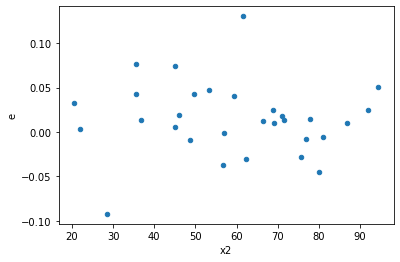

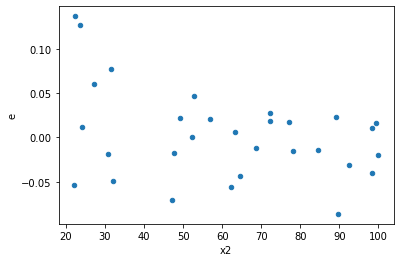

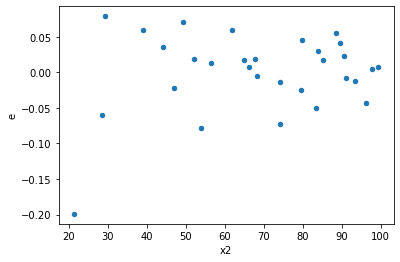

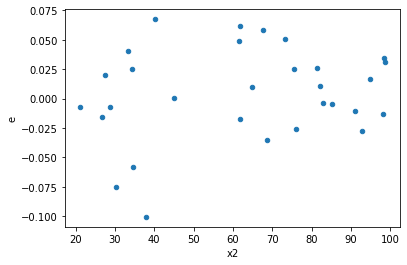

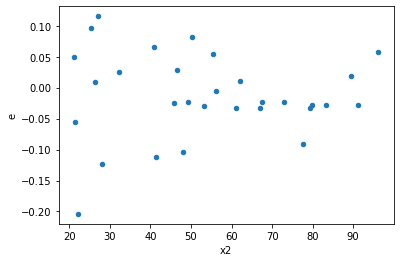

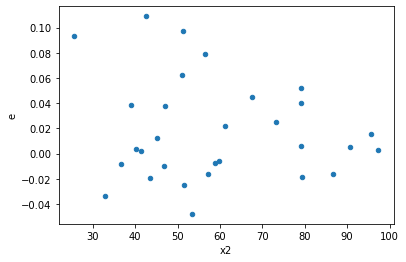

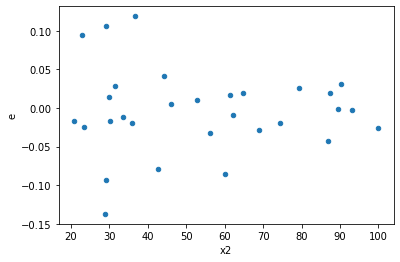

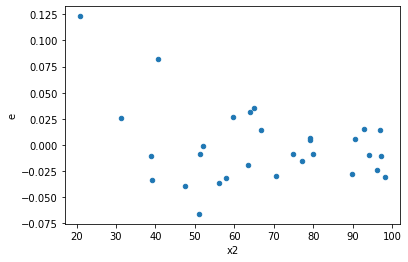

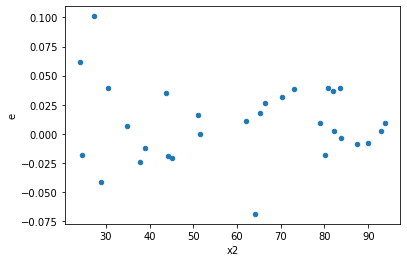

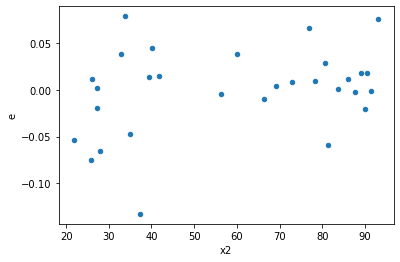

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,15.0,0.009733728472408979,0.02502538963054573,0.0008848844065826345,0.0016683593087030485,1.885398020681755,0.25184036718476,0.87407981640762,0.12592018359238,Reject005=1 : Homoscedasticity
1.0,10.0,16.0,0.012064413872752968,0.05346107001597398,0.0012064413872752968,0.0033413168759983737,2.769564200333523,0.06744954172189832,0.9662752291390508,0.03372477086094916,Reject005=1 : Homoscedasticity
4.0,14.0,12.0,0.04635284508506139,0.07703823829043534,0.0033109175060758137,0.0064198531908696115,1.9389952117769886,0.25699452736490613,0.8715027363175469,0.12849726368245307,Reject005=1 : Homoscedasticity
5.0,12.0,14.0,0.013666472579446283,0.024268902575872865,0.001138872714953857,0.001733493041133776,1.5221130670463126,0.4494063004586548,0.7752968497706726,0.2247031502293274,Reject005=1 : Homoscedasticity
8.0,16.0,10.0,0.0135743729351625,0.016396370170083815,0.0008483983084476563,0.0016396370170083815,1.9326264570334681,0.2924663539195973,0.8537668230402014,0.14623317695979865,Reject005=1 : Homoscedasticity
10.0,11.0,15.0,0.00913749414289924,0.038712790677410104,0.0008306812857181128,0.0025808527118273404,3.1069108648526105,0.043843641756559526,0.9780781791217202,0.021921820878279763,Reject005=0 : Heteroscedasticity
11.0,19.0,7.0,0.05943288225080915,0.06526332418911543,0.0031280464342531133,0.00932333202701649,2.980560622413724,0.1447051664636514,0.9276474167681743,0.0723525832318257,Reject005=1 : Homoscedasticity
12.0,11.0,15.0,0.009495626052557885,0.03373103642584512,0.0008632387320507168,0.002248735761723008,2.6049986848723683,0.08696708153406196,0.956516459232969,0.04348354076703098,Reject005=1 : Homoscedasticity
16.0,18.0,8.0,0.016440554787426682,0.017134047172588776,0.000913364154857038,0.002141755896573597,2.344909076171081,0.22007553301488247,0.8899622334925588,0.11003776650744124,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,15.0,0.009733728472408979,0.02502538963054573,0.0008848844065826345,0.0016683593087030485,1.885398020681755,0.25184036718476,Reject005=1 : Homoscedasticity
1.0,10.0,16.0,0.012064413872752968,0.05346107001597398,0.0012064413872752968,0.0033413168759983737,2.769564200333523,0.06744954172189832,Reject005=1 : Homoscedasticity
2.0,8.0,18.0,0.05538544053595339,0.020525336481526227,0.006923180066994173,0.0011402964711959016,0.16470703638522902,0.013733997880494052,Reject005=0 : Heteroscedasticity
3.0,17.0,9.0,0.03333510766593642,0.007161373995190769,0.0019608886862315543,0.0007957082216878632,0.4057895928896705,0.10445753596302859,Reject005=1 : Homoscedasticity
4.0,14.0,12.0,0.04635284508506139,0.07703823829043534,0.0033109175060758137,0.0064198531908696115,1.9389952117769886,0.25699452736490613,Reject005=1 : Homoscedasticity
5.0,12.0,14.0,0.013666472579446283,0.024268902575872865,0.001138872714953857,0.001733493041133776,1.5221130670463126,0.4494063004586548,Reject005=1 : Homoscedasticity
6.0,15.0,11.0,0.04707904536233158,0.03408530842283732,0.0031386030241554387,0.0030986644020761203,0.9872750323083419,0.9589484839102054,Reject005=1 : Homoscedasticity
7.0,9.0,17.0,0.01803162171822122,0.011844209170997409,0.0020035135242468024,0.0006967181865292593,0.3477481824292563,0.11034178846744425,Reject005=1 : Homoscedasticity
8.0,16.0,10.0,0.0135743729351625,0.016396370170083815,0.0008483983084476563,0.0016396370170083815,1.9326264570334681,0.2924663539195973,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      664
Reject005=0 : Heteroscedasticity    336
Name: Result_test, dtype: int64